In [ ]:
# EDA - level 2 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import zscore, ks_2samp
%matplotlib inline
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [132]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\מיכאל\Desktop\air bnb germany project\CleanEDAdata.csv", encoding='latin1',low_memory=False)
df.head()

,index,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Postal Code,Is Exact Location,Property Type,Room Type,Accomodates,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Years From Today,SentimentScore
0,0,NaN,NaN,f,Neuklln,12047.0,t,Apartment,Entire homeapt,4,...,100.0,8.0,10.0,6.0,10.0,10.0,10.0,f,8.895890,6.250000
1,1,NaN,NaN,f,Prenzlauer Berg,10405.0,f,Apartment,Entire homeapt,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,8.854795,5.000000
2,2,1.0,100.0,f,Mitte,10178.0,t,Apartment,Private room,2,...,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,9.016438,5.625000
3,3,1.0,100.0,f,Mitte,10178.0,t,Apartment,Private room,2,...,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,9.016438,6.086957
4,4,1.0,100.0,f,Mitte,10178.0,t,Apartment,Private room,2,...,92.0,9.0,8.0,9.0,10.0,10.0,9.0,f,9.016438,5.212766


In [133]:
df = df.drop('index', axis=1)  # Drop index column

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456002 entries, 0 to 456001
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Host Response Time    397295 non-null  float64
 1   Host Response Rate    397295 non-null  float64
 2   Is Superhost          455954 non-null  object 
 3   neighbourhood         456002 non-null  object 
 4   Postal Code           447985 non-null  float64
 5   Is Exact Location     456002 non-null  object 
 6   Property Type         456002 non-null  object 
 7   Room Type             456002 non-null  object 
 8   Accomodates           456002 non-null  int64  
 9   Bathrooms             455059 non-null  float64
 10  Bedrooms              455285 non-null  float64
 11  Beds                  455912 non-null  float64
 12  Square Feet           28608 non-null   float64
 13  Price                 456002 non-null  int64  
 14  Guests Included       456002 non-null  int64  
 15  

In [135]:
# #Drop duplicates rows that not influnced from reviews parameter - to make all apartment as unique as possible
# # Columns to check for duplicates
# columns_to_check = ['Postal Code', 'Room Type','Price','neighbourhood','Bedrooms','Property Type','Bathrooms','Guests Included' ,'Square Feet','Guests Included','Min Nights' ,'Is Exact Location' ]

# # Identify duplicate rows based on the specified columns
# duplicates = df.duplicated(subset=columns_to_check, keep=False)

# # Drop all rows that are duplicates
# df = df[~duplicates]

df = df.drop_duplicates()

In [136]:
#FIND Outliers

In [137]:
# Selecting numeric features
numeric_cols = df.select_dtypes(include=[float]).columns
numeric_cols

Index(['Host Response Time', 'Host Response Rate', 'Postal Code', 'Bathrooms',
       'Bedrooms', 'Beds', 'Square Feet', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Years From Today',
       'SentimentScore'],
      dtype='object')

In [138]:
# Define thresholds for skewness
LEFT_SKEW_THRESHOLD = -1
RIGHT_SKEW_THRESHOLD = 1

# Function to classify skewness
def classify_skewness(skewness):
    if skewness > RIGHT_SKEW_THRESHOLD:
        return 'Right-Skewed'
    elif skewness < LEFT_SKEW_THRESHOLD:
        return 'Left-Skewed'
    else:
        return 'Normal'

# Function to apply background color based on skewness
def highlight(cell_value):
    if cell_value > RIGHT_SKEW_THRESHOLD:
        return 'background-color: mediumspringgreen;'
    elif cell_value < LEFT_SKEW_THRESHOLD:
        return 'background-color: hotpink;'
    else:
        return ''

# Calculate skewness
skewness_df = pd.DataFrame(df[numeric_cols].skew(), columns=['Skewness'])

# Classify features based on skewness
skewness_df['Classification'] = skewness_df['Skewness'].apply(classify_skewness)

# Sort DataFrame by skewness
skewness_df_sorted = skewness_df.sort_values(by='Skewness', ascending=False)

# Apply highlighting to sorted skewness DataFrame
styled_df = skewness_df_sorted.style.applymap(highlight, subset=['Skewness'])

# Create lists of features for each category
left_skewed_features = skewness_df[skewness_df['Classification'] == 'Left-Skewed'].index.tolist()
right_skewed_features = skewness_df[skewness_df['Classification'] == 'Right-Skewed'].index.tolist()
normal_features = skewness_df[skewness_df['Classification'] == 'Normal'].index.tolist()

# Print lists Distrbutaion left , right , nornal 
print('Left-Skewed Features:', left_skewed_features)
print('Right-Skewed Features:', right_skewed_features)
print('Normal Features:', normal_features)

# Display styled DataFrame
styled_df

Left-Skewed Features: ['Host Response Rate', 'Overall Rating', 'Accuracy Rating', 'Cleanliness Rating', 'Checkin Rating', 'Communication Rating', 'Location Rating', 'SentimentScore']
Right-Skewed Features: ['Host Response Time', 'Postal Code', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet']
Normal Features: ['Value Rating', 'Years From Today']


,Skewness,Classification
Postal Code,38.483990,Right-Skewed
Bathrooms,5.206416,Right-Skewed
Square Feet,3.412991,Right-Skewed
Beds,2.937842,Right-Skewed
Bedrooms,2.164682,Right-Skewed
Host Response Time,1.367848,Right-Skewed
Years From Today,0.006185,Normal
Value Rating,-0.976137,Normal
Location Rating,-1.435731,Left-Skewed
SentimentScore,-1.512532,Left-Skewed


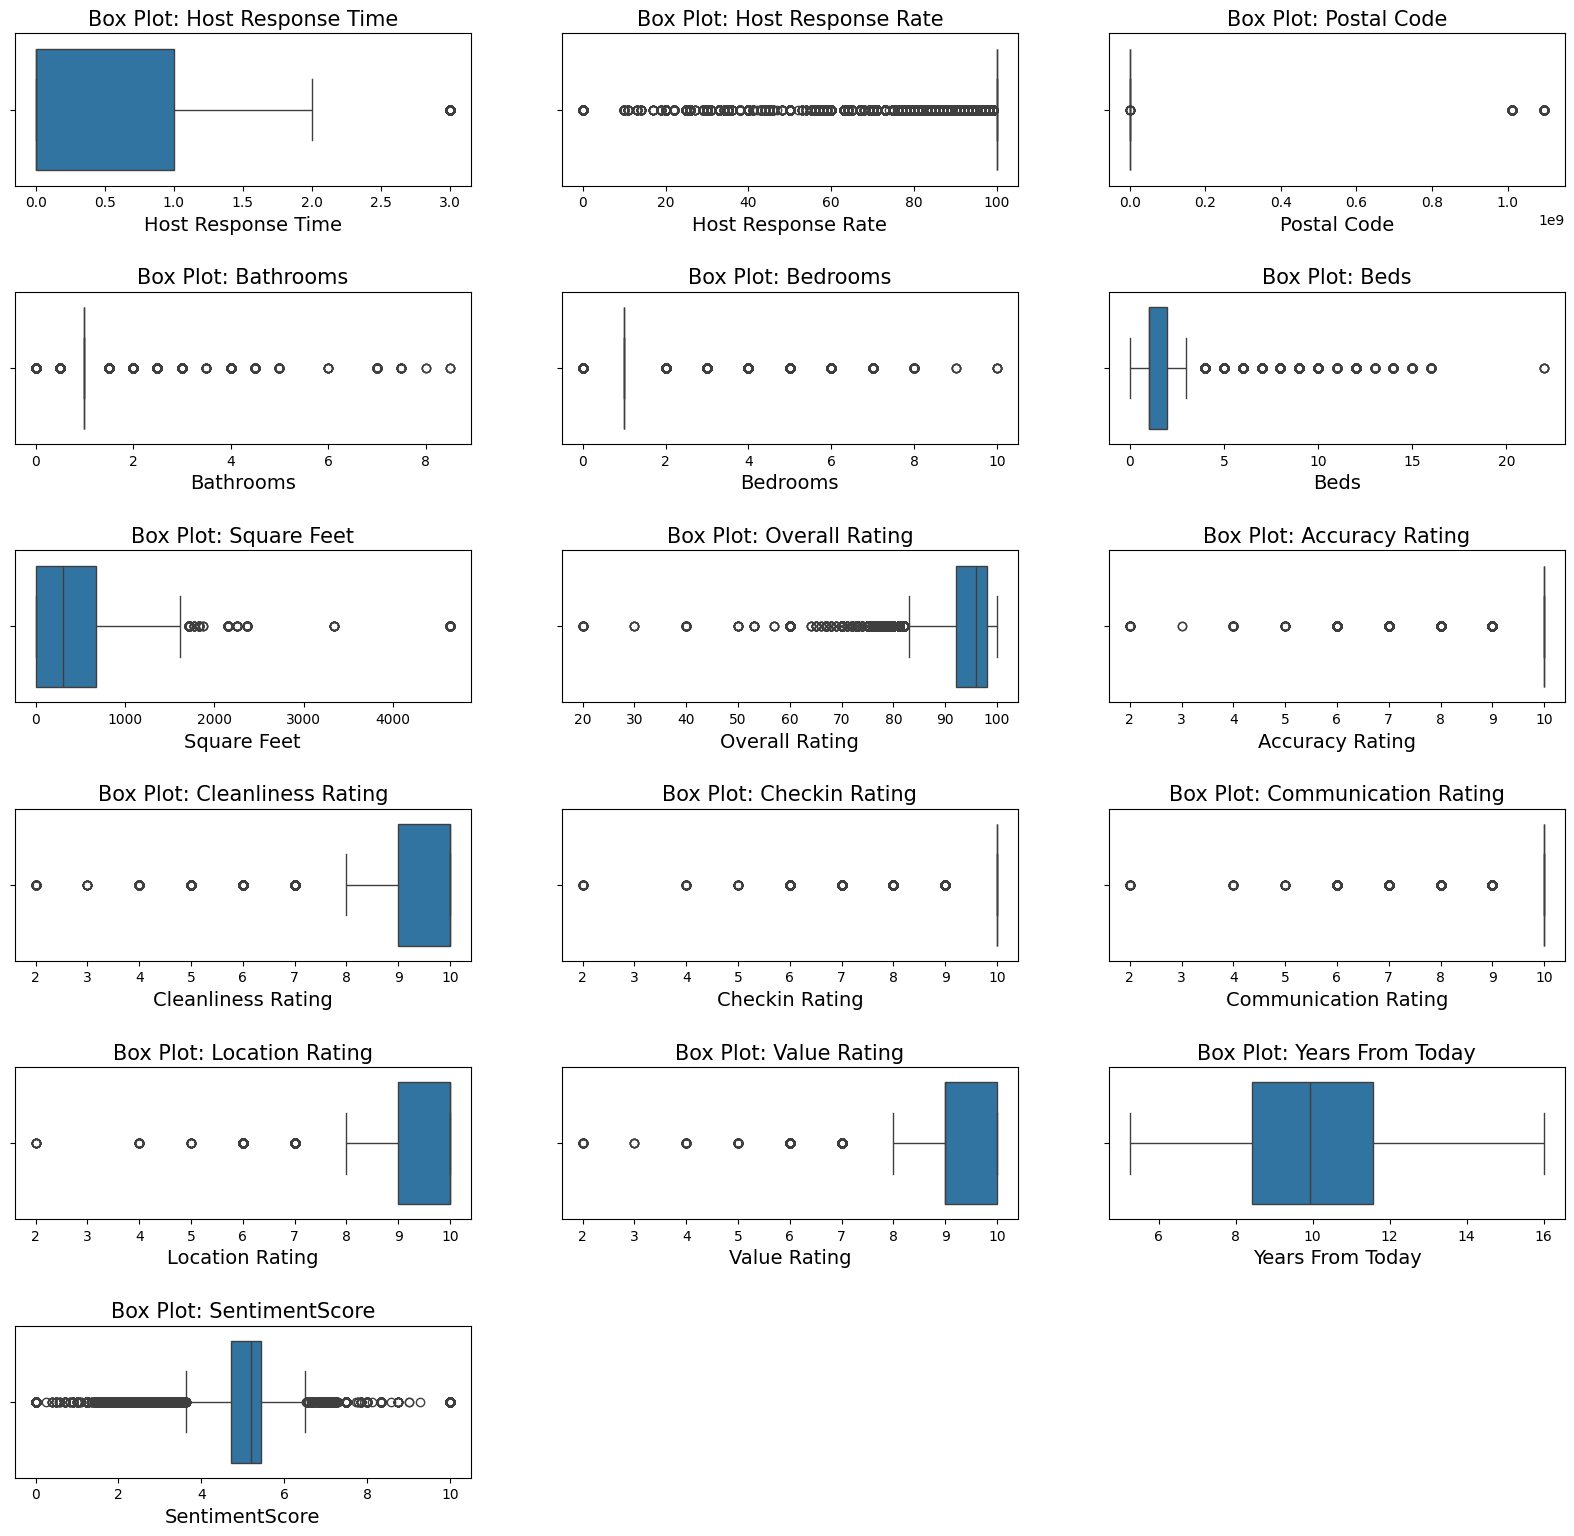

In [139]:
# Define the function to plot box plots for each numeric column
def outliers_boxplot(df):
    plt.figure(figsize=(20, 200))
    for i, col in enumerate(df.columns):
        ax = plt.subplot(60, 3, i + 1)
        sb.boxplot(data=df, x=col, ax=ax)
        plt.title(f'Box Plot: {col}', fontsize=15)
        plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.7)
    plt.show()

# Assuming con_df contains the continuous numeric columns
outliers_boxplot(df[numeric_cols])

In [140]:
# Make on normal disurbation a zscore outlier 
normal_features = [col for col in normal_features if col in df.columns]
normal_features

['Value Rating', 'Years From Today']

In [141]:
# Importing scipy stats and zscore libreries
from scipy import stats
from scipy.stats import zscore

In [148]:
# # Calculate z-scores
# z_scores = pd.DataFrame(stats.zscore(df[normal_features]), columns=normal_features)

# # Identify outliers
# outliers = (np.abs(z_scores) > 2.5).astype(int)  # 1 if outlier, 0 otherwise

# # Set up the matplotlib figure
# fig, axes = plt.subplots(nrows=1, ncols=len(normal_features), figsize=(15, 5), sharex=True, sharey=True)

# for i, feature in enumerate(normal_features):
#     ax = axes[i] if len(normal_features) > 1 else axes
    
#     # Plot all data points
#     sns.scatterplot(x=df[feature], y=df[feature], ax=ax, color='blue', label='Normal Data', alpha=0.6)
    
#     # Plot outliers
#     outlier_indices = df.index[np.abs(z_scores[feature]) > 2.5]
#     sns.scatterplot(x=df.loc[outlier_indices, feature], 
#                     y=df.loc[outlier_indices, feature], 
#                     ax=ax, color='red', marker='v', label='Outliers')
    
#     # Annotate outliers with z-scores
#     for idx in outlier_indices:
#         ax.text(df.loc[idx, feature], df.loc[idx, feature],
#                 f'{z_scores.loc[idx, feature]:.2f}', color='red', fontsize=8, ha='right')
    
#     ax.set_title(f'Scatter Plot of {feature}')
#     ax.set_xlabel(feature)
#     ax.set_ylabel(feature)
#     ax.legend()

# # Adjust layout
# plt.tight_layout()
# plt.show()
# plt.close()

In [110]:
# EXPLAIN TO THIS PLOT 
## host resopnse time is a category columns that contain only 3 unique values hence this columns has not have an outliers.
## Year from today columns has a outliers values becuase it is a continuous numeric varibale 

In [149]:
# Ensure all features in normal_features exist in the DataFrame
normal_features = [col for col in normal_features if col in df.columns]

# Create a copy of the DataFrame to store the standardized values
df_zscore = df[normal_features].copy()

# Apply z-score standardization using scipy.stats.zscore
df_zscore = df_zscore.apply(lambda x: stats.zscore(x, nan_policy='omit'))

# Replace values that are beyond ±2.5 standard deviations with NaN
threshold = 2.5
df_zscore[np.abs(df_zscore) > threshold] = np.nan

# Display the standardized DataFrame with outliers replaced by NaN
print(df_zscore)

        Value Rating  Years From Today
0           0.964942         -0.501597
1                NaN         -0.521300
2          -0.728949         -0.443804
3          -0.728949         -0.443804
4          -0.728949         -0.443804
...              ...               ...
455997      0.964942          0.702877
455998      0.964942          0.702877
455999     -0.728949         -0.613244
456000     -0.728949         -0.613244
456001     -0.728949         -0.613244

[276881 rows x 2 columns]


In [150]:
df_zscore.isna().sum()

Value Rating        5600
Years From Today     703
dtype: int64

In [151]:
# Update original DataFrame with NaN values
df_with_nans = df.copy()
for col in df_zscore.columns:
    df_with_nans[col] = df_zscore[col]

# Display the updated DataFrame
print(df_with_nans[['Host Response Time', 'Years From Today']])
print(df_with_nans[['Host Response Time', 'Years From Today']].isna().sum())

        Host Response Time  Years From Today
0                      NaN         -0.501597
1                      NaN         -0.521300
2                      1.0         -0.443804
3                      1.0         -0.443804
4                      1.0         -0.443804
...                    ...               ...
455997                 NaN          0.702877
455998                 NaN          0.702877
455999                 1.0         -0.613244
456000                 1.0         -0.613244
456001                 1.0         -0.613244

[276881 rows x 2 columns]
Host Response Time    44676
Years From Today        703
dtype: int64


In [152]:
df2 = df_with_nans.copy()

In [153]:
# Function to identify and treat outliers using IQR - for left right skwed
def treat_outliers(df, features):
    df_outliers = pd.DataFrame(index=df.index)
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_outliers[feature] = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).astype(int)
    return df_outliers

In [154]:
# Apply the outlier treatment function to numeric columns for left right skwed use IQE
df_excluded = df2.drop(columns=normal_features)
outliers_df = treat_outliers(df, numeric_cols)
outliers_df

,Host Response Time,Host Response Rate,Postal Code,Bathrooms,Bedrooms,Beds,Square Feet,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Years From Today,SentimentScore
0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455997,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
455998,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
455999,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
456000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [155]:
#Creating a table for outliers change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])


# Checking distribution and correlation changes

for col in numeric_cols:
    out = df[col]
    non_out = df[col][outliers_df[col] == 0]
    cor_out = df['Price']
    cor_non_out = df['Price'][outliers_df[col] == 0]
    
    # Filter out NaN values for correlation calculation
    valid_out = ~np.isnan(out) & ~np.isnan(cor_out)
    valid_non_out = ~np.isnan(non_out) & ~np.isnan(cor_non_out)
    
    if valid_out.sum() > 1 and valid_non_out.sum() > 1:
        cor_change = '+' if abs(np.corrcoef(out[valid_out], cor_out[valid_out])[0, 1] - 
                                np.corrcoef(non_out[valid_non_out], cor_non_out[valid_non_out])[0, 1]) > 0.05 else '-'
    else:
        cor_change = '-'

    dist_change = '+' if ks_2samp(out.dropna(), non_out.dropna())[1] < 0.05 else '-'

    new_row = pd.DataFrame({'feature': [col],
                            'outliers_cnt': [outliers_df[col].sum()],
                            'distribution_changed': [dist_change],
                            'correlation_changed': [cor_change]})

    out_df = pd.concat([out_df, new_row], ignore_index=True)

In [156]:
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed
0,Host Response Time,4092,+,-
1,Host Response Rate,52182,+,-
2,Postal Code,198,-,-
3,Bathrooms,34297,+,-
4,Bedrooms,73594,+,-
5,Beds,29715,+,-
6,Square Feet,399,+,+
7,Overall Rating,5484,+,-
8,Accuracy Rating,58733,+,-
9,Cleanliness Rating,4084,+,-


In [157]:
# Filter features where only distribution changes but not correlation
out_df['drop'] = np.where((out_df['distribution_changed'] == '+') & (out_df['correlation_changed'] == '-'), 'yes', 'no')
to_drop = out_df[out_df['drop'] == 'yes']['feature']

In [158]:
to_drop

0       Host Response Time
1       Host Response Rate
3                Bathrooms
4                 Bedrooms
5                     Beds
7           Overall Rating
8          Accuracy Rating
9       Cleanliness Rating
10          Checkin Rating
11    Communication Rating
13            Value Rating
15          SentimentScore
Name: feature, dtype: object

In [159]:
# Remove outliers - Replace outliers with Nan Values
df_cleaned = df.copy()
for col in to_drop:
    df_cleaned.loc[outliers_df[col] == 1, col] = np.nan

In [160]:
# Save cleaned data
df_cleaned.to_csv(r'C:\Users\מיכאל\Desktop\air bnb germany project\df_cleanedlevel2.csv',index=False)

In [161]:
!pip install missingno

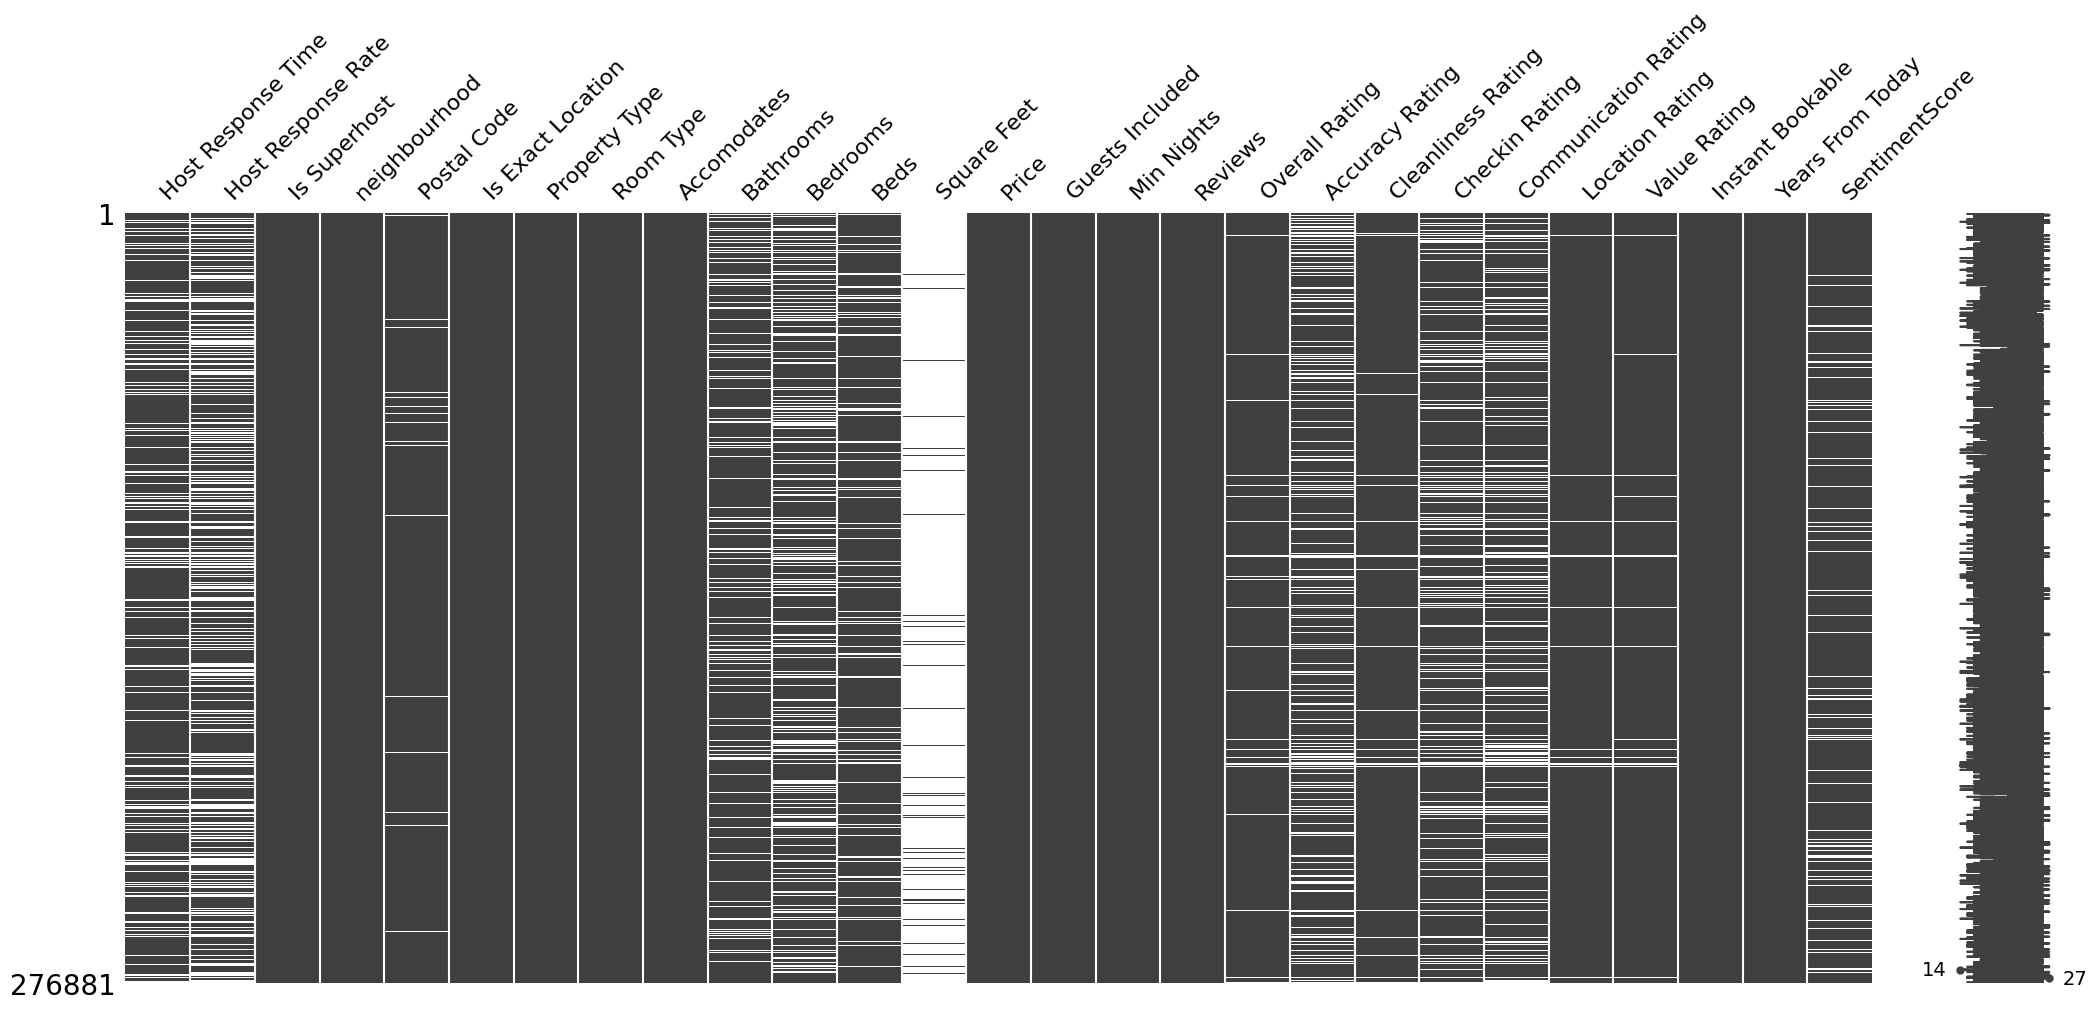

In [162]:
import missingno as msno
msno.matrix(df_cleaned)
plt.show()
plt.close()

In [163]:
df_nulls = df_cleaned.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

,Host Response Time,Host Response Rate,Is Superhost,Postal Code,Bathrooms,Bedrooms,Beds,Square Feet,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Years From Today,SentimentScore
0,NaN,NaN,f,12047.0,1.0,NaN,2.0,NaN,100.0,NaN,10.0,NaN,10.0,10.0,10.0,8.895890,6.250000
1,NaN,NaN,f,10405.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.854795,5.000000
2,1.0,100.0,f,10178.0,1.0,1.0,1.0,NaN,92.0,NaN,8.0,NaN,10.0,10.0,9.0,9.016438,5.625000
3,1.0,100.0,f,10178.0,1.0,1.0,1.0,NaN,92.0,NaN,8.0,NaN,10.0,10.0,9.0,9.016438,6.086957
4,1.0,100.0,f,10178.0,1.0,1.0,1.0,NaN,92.0,NaN,8.0,NaN,10.0,10.0,9.0,9.016438,5.212766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455997,NaN,NaN,f,10245.0,NaN,NaN,NaN,0.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,11.408219,4.615385
455998,NaN,NaN,f,10245.0,NaN,NaN,NaN,0.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,11.408219,4.285714
455999,1.0,100.0,f,13355.0,NaN,1.0,1.0,NaN,NaN,10.0,9.0,10.0,10.0,9.0,9.0,8.663014,5.000000
456000,1.0,100.0,f,13355.0,NaN,1.0,1.0,NaN,NaN,10.0,9.0,10.0,10.0,9.0,9.0,8.663014,5.425532


In [164]:
# Calculate the percentage of missing values in each column
missing_percentage = df_nulls.isnull().mean() * 100 

# Display the missing percentages
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Column name ', 'Missing Values Percentage']
missing_percentage

,Column name,Missing Values Percentage
0,Host Response Time,17.613343
1,Host Response Rate,34.981815
2,Is Superhost,0.014085
3,Postal Code,1.860366
4,Bathrooms,12.588079
5,Bedrooms,26.712198
6,Beds,10.758412
7,Square Feet,94.623322
8,Overall Rating,3.618522
9,Accuracy Rating,22.861085


In [165]:
# Remove category with more than 70 % of missing values etc . Square Feet contain 92 % of missing values 
# I think is super important feautue but there is too much missing values hence i drop this feature 
del df_cleaned['Square Feet']

In [166]:
#Imputation with KNN

In [167]:
from sklearn.impute import KNNImputer

In [168]:
# Choose Knn way to fill nan values - by find the simmilar values  
final_df = df_cleaned.copy()
imp_cols = final_df.select_dtypes(include = ['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(final_df[imp_cols]),columns = imp_cols)

In [169]:
final_df[imp_cols] = imputed_data
final_df

,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Postal Code,Is Exact Location,Property Type,Room Type,Accomodates,Bathrooms,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Years From Today,SentimentScore
0,0.666667,100.0,f,Neuklln,12047.0,t,Apartment,Entire homeapt,4.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,8.895890,6.250000
1,0.666667,100.0,f,Prenzlauer Berg,10405.0,f,Apartment,Entire homeapt,2.0,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,8.854795,5.000000
2,1.000000,100.0,f,Mitte,10178.0,t,Apartment,Private room,2.0,1.0,...,92.0,10.0,8.0,10.0,10.0,10.0,9.0,f,9.016438,5.625000
3,1.000000,100.0,f,Mitte,10178.0,t,Apartment,Private room,2.0,1.0,...,92.0,10.0,8.0,10.0,10.0,10.0,9.0,f,9.016438,6.086957
4,1.000000,100.0,f,Mitte,10178.0,t,Apartment,Private room,2.0,1.0,...,92.0,10.0,8.0,10.0,10.0,10.0,9.0,f,9.016438,5.212766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455997,NaN,NaN,f,Friedrichshain-Kreuzberg,NaN,f,Apartment,Entire homeapt,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN
455998,NaN,NaN,f,Friedrichshain-Kreuzberg,NaN,f,Apartment,Entire homeapt,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN
455999,NaN,NaN,f,Wedding,NaN,t,Apartment,Entire homeapt,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN
456000,NaN,NaN,f,Wedding,NaN,t,Apartment,Entire homeapt,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN


In [170]:
#Checking at the updated missing matrix

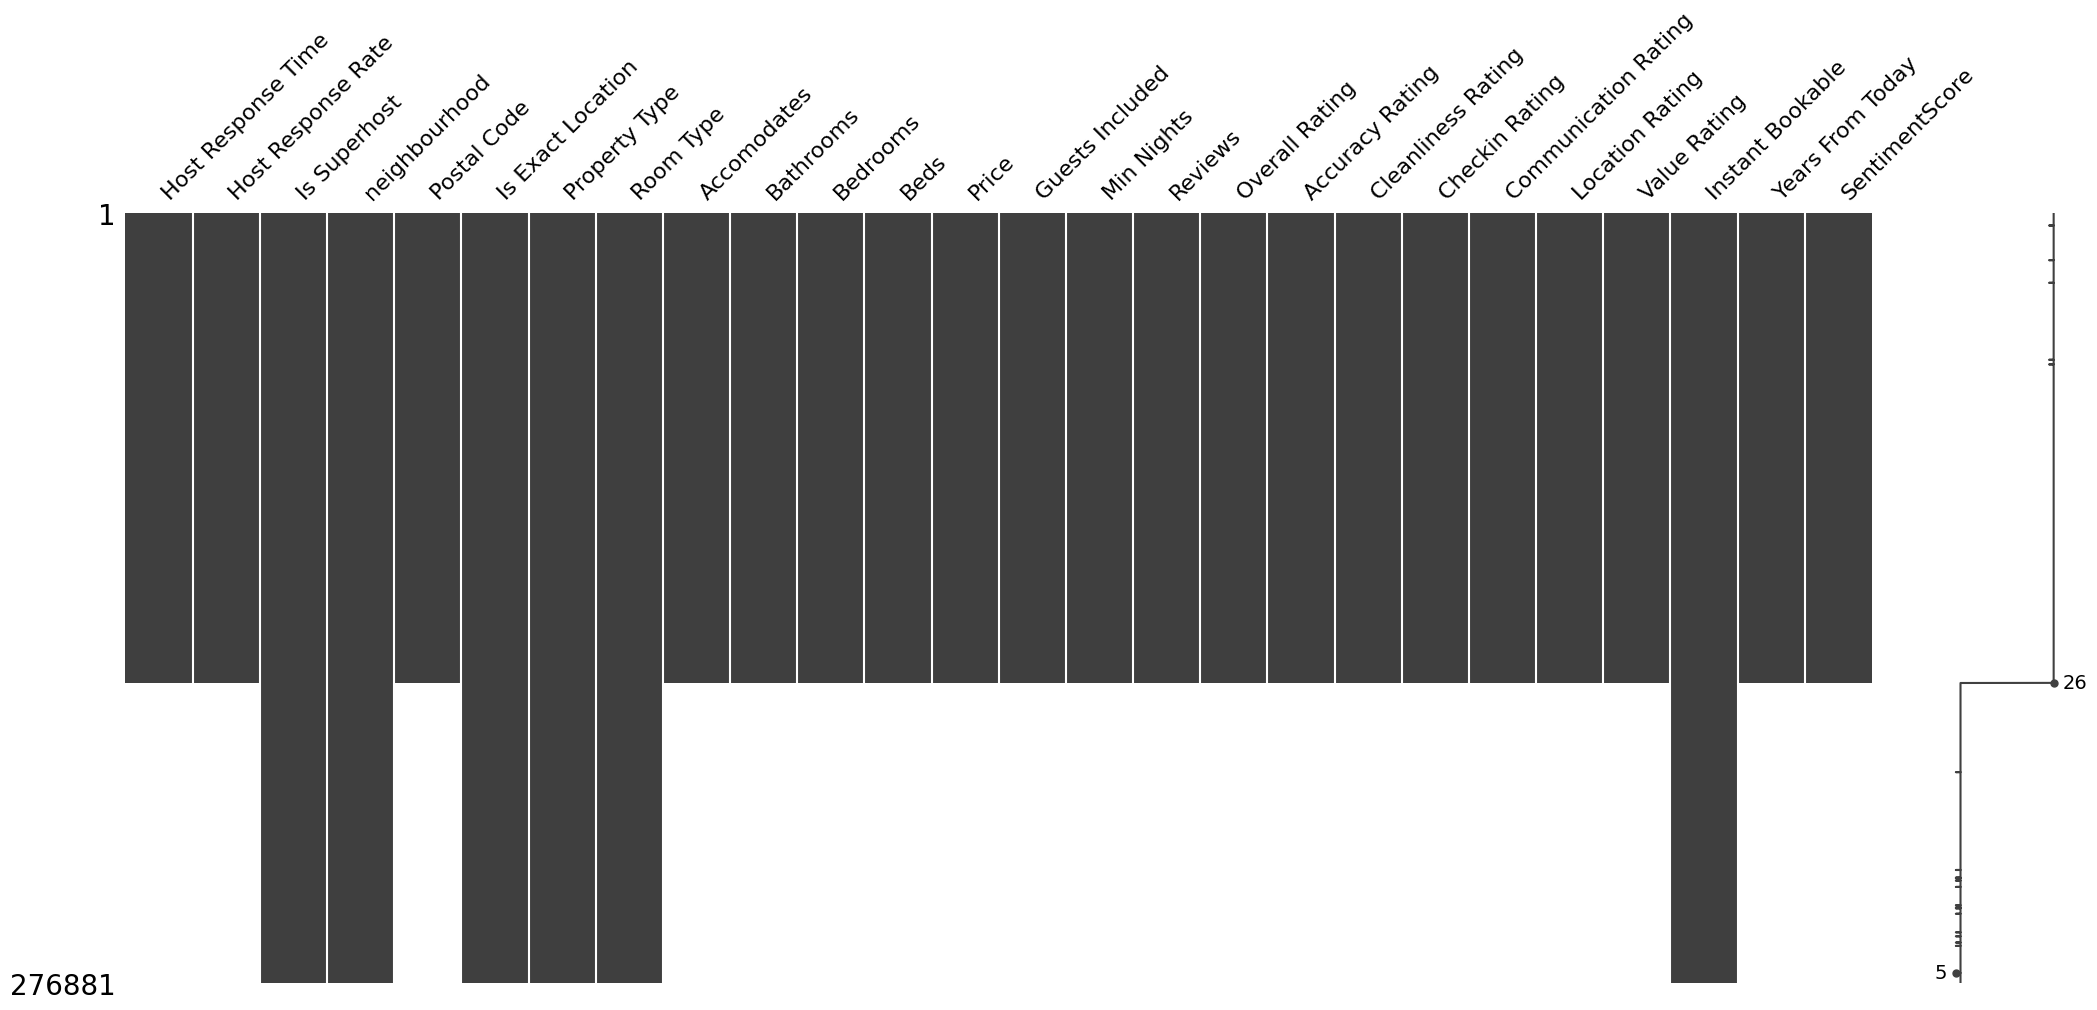

In [171]:
msno.matrix(final_df)
plt.show()

In [174]:
final_df.isna().sum()

Host Response Time      107880
Host Response Rate      107880
Is Superhost                39
neighbourhood                0
Postal Code             107880
Is Exact Location            0
Property Type                0
Room Type                    0
Accomodates             107880
Bathrooms               107880
Bedrooms                107880
Beds                    107880
Price                   107880
Guests Included         107880
Min Nights              107880
Reviews                 107880
Overall Rating          107880
Accuracy Rating         107880
Cleanliness Rating      107880
Checkin Rating          107880
Communication Rating    107880
Location Rating         107880
Value Rating            107880
Instant Bookable             0
Years From Today        107880
SentimentScore          107880
dtype: int64

In [177]:
final_df2 = final_df.copy()

# Define the maximum number of allowed null columns
max_null_columns = 5

# Calculate the threshold for the minimum number of non-null values a row must have
threshold = df.shape[1] - max_null_columns

# Drop rows where the number of non-null values is less than the threshold
dffinito = final_df2.dropna(thresh=threshold)
dffinito.isna().sum()

Host Response Time      0
Host Response Rate      0
Is Superhost            8
neighbourhood           0
Postal Code             0
Is Exact Location       0
Property Type           0
Room Type               0
Accomodates             0
Bathrooms               0
Bedrooms                0
Beds                    0
Price                   0
Guests Included         0
Min Nights              0
Reviews                 0
Overall Rating          0
Accuracy Rating         0
Cleanliness Rating      0
Checkin Rating          0
Communication Rating    0
Location Rating         0
Value Rating            0
Instant Bookable        0
Years From Today        0
SentimentScore          0
dtype: int64

In [178]:
# Save cleaned data
dffinito.to_csv(r'C:\Users\מיכאל\Desktop\air bnb germany project\df_final.csv',index=False)
print("saved file ")

saved file 
